In [1]:
import numpy as np#数据
from matplotlib.animation import FuncAnimation#动态图
from matplotlib import pyplot as plt#创建子图
from matplotlib.patches import Circle
%matplotlib inline

In [2]:
event = np.array([
    [0.5,0.5,10],
    [0.2,0.3,10]
])
event[:,0] = event[:,0]*2560
event[:,1] = event[:,1]*1440

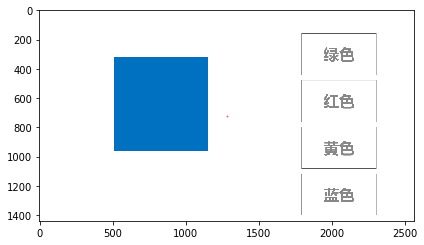

In [3]:
img = plt.imread('data/gd_img/Stroop_1.png')

fig, ax = plt.subplots()
fig.set_tight_layout(True)
#plt.xlim(0,1)
#plt.ylim(0,1)
#fig.figimage(img,resize=True)
#sca = ax.scatter(gaze_points[0][0],gaze_points[0][1],label="test")
ax.imshow(img)
sca = ax.scatter(event[0][0],event[0][1],s=1,c='r',alpha=0.5)
#sca, = plt.plot(gaze_points[0][0],gaze_points[0][1],'r-o',)
#sca.set_offsets([gaze_points[1][0],gaze_points[1][1]])
#label = 'timestep {0}'.format(0)

In [7]:
def update_circle(i):
    if(i<=10):
        area = (1+i)**2
        #sca.set_offsets(event[0][0],event[0][1])
        sca.set_sizes([area])
    else:
        area = (i-9)**2
        #sca.set_offsets(event[1][0],event[1][1])
        sca.set_sizes([area])        

In [7]:
def update(i):#i:第i帧，即第i行数据
    x_data = []
    y_data = []
    for m in range(-1,2):
        if((i+m)<0 or (i+m)>=10):
            continue
        x_data.append(gaze_points[i+m][0])
        y_data.append(gaze_points[i+m][1])
        #data.append([gaze_points[i+m][0],gaze_points[i+m][1]])
    #x = gaze_points[i][0]
    #y = gaze_points[i][1]
    #sca.set_offsets(data)
    sca.set_data(x_data,y_data)
    #label = 'timestep {0}'.format(i)
    #ax.set_xlabel(label)
    return sca

In [8]:
ani = FuncAnimation(fig = fig,
                    func = update_circle,
                    frames = 20,
                    interval = 33,
                    blit = False)

In [9]:
ani.save('demoanimation.gif', writer='pillow', fps=2)